<a href="https://colab.research.google.com/github/ritusingla/deep-image-prior/blob/master/Copy_of_flash_no_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for **"Flash/No Flash"** figure. 

In [2]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/DmitryUlyanov/deep-image-prior
!mv deep-image-prior/* ./

fatal: destination path 'deep-image-prior' already exists and is not an empty directory.
mv: cannot stat 'deep-image-prior/*': No such file or directory


# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from utils.denoising_utils import *
from utils.sr_utils import load_LR_HR_imgs_sr
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True

# Load image

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


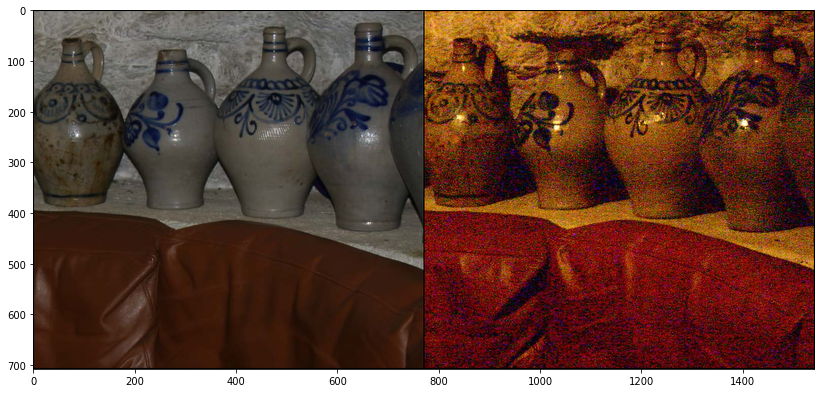

In [4]:
imgs = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')
img_flash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_noflash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_01_noflash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_noflash_np = pil_to_np(img_noflash)

g = plot_image_grid([img_flash_np, img_noflash_np],3,12)

# Setup

In [0]:
pad = 'reflection'
OPT_OVER = 'net'

num_iter = 100
LR = 0.1 
OPTIMIZER = 'adam'
reg_noise_std = 0.0
show_every = 50
figsize = 6

# We will use flash image as input
input_depth = 3
net_input =np_to_torch(img_flash_np).type(dtype)

In [0]:
net = skip(input_depth, 3, num_channels_down = [128, 128, 128, 128, 128], 
                        num_channels_up   = [128, 128, 128, 128, 128],
                        num_channels_skip = [4, 4, 4, 4, 4], 
                        upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], 
                        need_sigmoid=True, need_bias=True, pad=pad).type(dtype)

mse = torch.nn.MSELoss().type(dtype)

img_flash_var = np_to_torch(img_flash_np).type(dtype)
img_noflash_var = np_to_torch(img_noflash_np).type(dtype)

# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


[0.13355039]


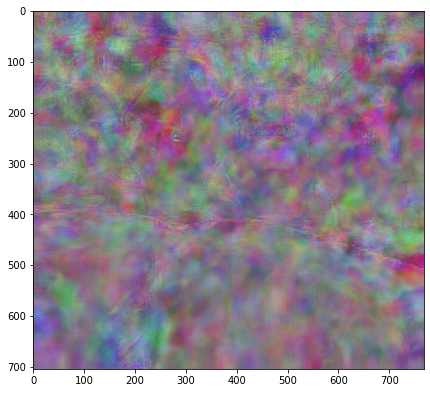

[0.13355039 0.06282011]
[0.13355039 0.06282011 0.05645096]
[0.13355039 0.06282011 0.05645096 0.05537174]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708 0.02811433]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708 0.02811433 0.02774857]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708 0.02811433 0.02774857 0.02601306]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708 0.02811433 0.02774857 0.02601306 0.02439598]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708 0.02811433 0.02774857 0.02601306 0.

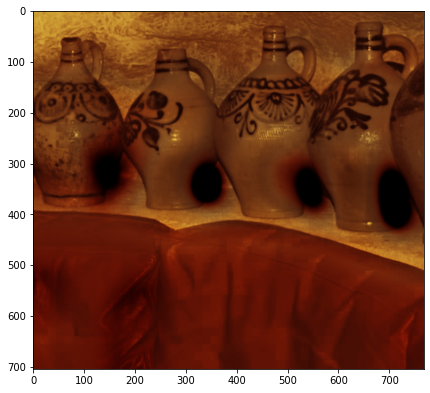

[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708 0.02811433 0.02774857 0.02601306 0.02439598
 0.02028591 0.02079152 0.01848944 0.01865632 0.01727754 0.017239
 0.01658131 0.01628494 0.01619739 0.01562445 0.01542018 0.01517357
 0.01504583 0.01473965 0.01480624 0.01486233 0.01442566 0.01413422
 0.01417652 0.01373357 0.01368778 0.0135332  0.01336987 0.0134404
 0.01305807 0.01320111 0.01293277 0.01288789 0.01281981 0.01261026
 0.01268964 0.01237919 0.01235427 0.01223466 0.01213623 0.01202506
 0.01190128 0.01176857 0.0116612  0.01156037]
[0.13355039 0.06282011 0.05645096 0.05537174 0.04632648 0.04558295
 0.04004015 0.03091708 0.02811433 0.02774857 0.02601306 0.02439598
 0.02028591 0.02079152 0.01848944 0.01865632 0.01727754 0.017239
 0.01658131 0.01628494 0.01619739 0.01562445 0.01542018 0.01517357
 0.01504583 0.01473965 0.01480624 0.01486233 0.01442566 0.01413422
 0.01417652 0.01373357 0.01368778 0.0135332  0.01336987 0.0134404
 0.01305807 0.01320111

In [7]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()

l=[]
i = 0
def closure():
    
    global i, net_input,l
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
   
    total_loss = mse(out, img_noflash_var)
    l=np.append(l,total_loss.item())
    print(l)
    total_loss.backward()
        
    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), '\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

Sometimes the process stucks at reddish image, just run the code from the top one more time. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


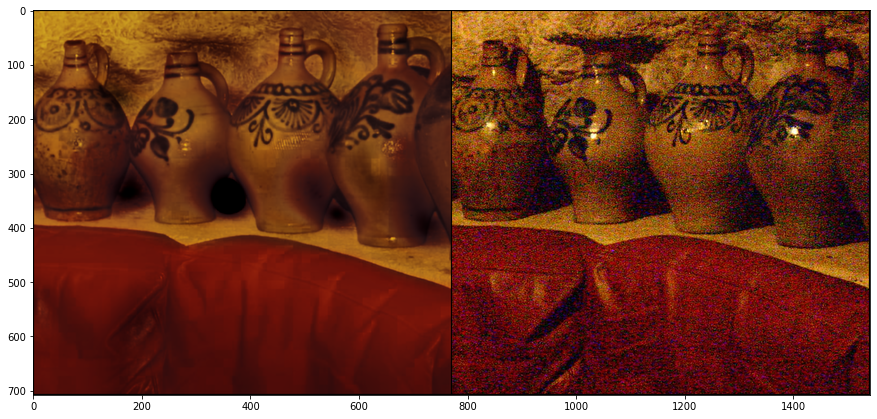

In [8]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_noflash_np], factor=13);

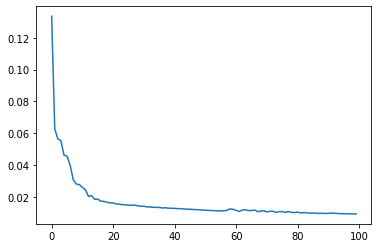

In [10]:
plt.plot(l)